[[0 2 4 6 0 2 4 6 0 2 4 6 0 2 4 6]
 [0 2 4 6 0 2 4 6 0 2 4 6 0 2 4 6]]


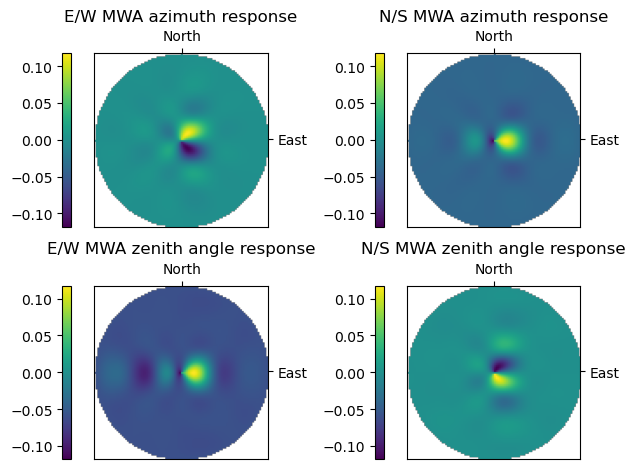

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from pyuvdata import UVBeam
from pyuvdata.datasets import fetch_data

filename = fetch_data("mwa_full_EE")

delays = np.empty((2, 16), dtype=int)

for pol in range(2):
    delays[pol] = np.tile(np.arange(0,8,2), 4)
    # delays[pol] = np.tile((np.arange(0,8,2))[np.newaxis, :].T, 4).flatten()
print(delays)


mwa_beam = UVBeam.from_file(
      filename, pixels_per_deg=1, beam_type="efield", delays=delays
)

# set up zenith angle, azimuth and frequency arrays to evaluate with
# make a regular grid in direction cosines for nice plots
n_vals = 100
zmax = np.radians(90)  # Degrees
axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
radius = np.sqrt(l_arr**2 + m_arr**2)
za_array = radius * zmax
az_array = np.arctan2(m_arr, l_arr)

# Wrap the azimuth array to [0, 2pi] to match the extent of the UVBeam azimuth
where_neg_az = np.nonzero(az_array < 0)
az_array[where_neg_az] = az_array[where_neg_az] + np.pi * 2.
az_array = az_array.flatten()
za_array = za_array.flatten()

# find the values above the horizon so we don't try to interpolate the MWA beam
# beyond the horizon
above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
mwa_beam_vals = np.full((mwa_beam.Naxes_vec, mwa_beam.Nfeeds, 1, n_vals * n_vals), np.inf, dtype=complex)

# The MWA beam we have in our test data is small, it only has 3 frequencies,
# so we will just get the value at one of those frequencies rather than
# trying to interpolate to a new frequency.
freqs = np.array([mwa_beam.freq_array[-1]])

mwa_beam_vals[:, :, :, above_hor], _ = mwa_beam.interp(
      az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
)
mwa_beam_vals = mwa_beam_vals.reshape(mwa_beam.Naxes_vec, mwa_beam.Nfeeds, 1, n_vals, n_vals)

fig, ax = plt.subplots(2, 2)

be00 = ax[0,0].imshow(
      mwa_beam_vals[0,0,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[0,0].set_title("E/W MWA azimuth response")
_ = fig.colorbar(be00, ax=ax[0,0], location="left")

be10 = ax[1,0].imshow(
      mwa_beam_vals[1,0,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[1,0].set_title("E/W MWA zenith angle response")
_ = fig.colorbar(be00, ax=ax[1,0], location="left")

be01 = ax[0,1].imshow(
      mwa_beam_vals[0,1,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[0,1].set_title("N/S MWA azimuth response")
_ = fig.colorbar(be00, ax=ax[0,1], location="left")

be11 = ax[1,1].imshow(
      mwa_beam_vals[1,1,0].real,
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[1,1].set_title("N/S MWA zenith angle response")
_ = fig.colorbar(be00, ax=ax[1,1], location="left")

for row_ind in range(2):
    for col_ind in range(2):
       _ = ax[row_ind,col_ind].set_xticks([0], labels=["North"])
       _ = ax[row_ind,col_ind].set_yticks([0], labels=["East"])
       _ = ax[row_ind,col_ind].yaxis.set_label_position("right")
       _ = ax[row_ind,col_ind].yaxis.tick_right()
       _ = ax[row_ind,col_ind].xaxis.set_label_position("top")
       _ = ax[row_ind,col_ind].xaxis.tick_top()

fig.tight_layout()

In [3]:
za_val = np.nonzero(np.isclose(mwa_beam.axis2_array, 80.0 * np.pi / 180))
print(np.max(np.abs(mwa_beam.data_array[0,0,0,za_val,:])))
print(np.max(np.abs(mwa_beam.data_array[1,0,0,za_val,:])))

0.007002266627331804
0.0032988436543480346


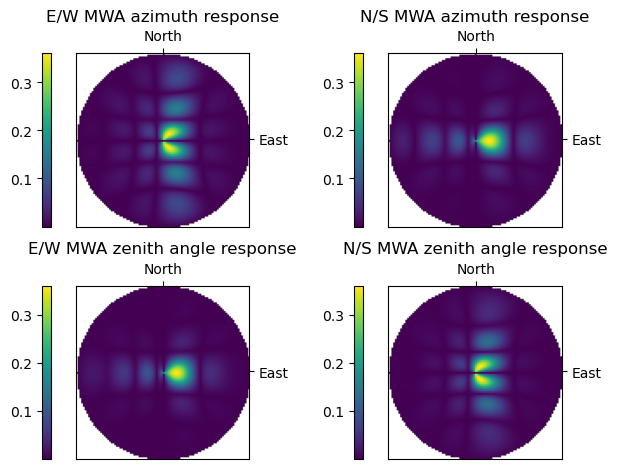

In [4]:
fig, ax = plt.subplots(2, 2)

be00 = ax[0,0].imshow(
      np.abs(mwa_beam_vals[0,0,0]),
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[0,0].set_title("E/W MWA azimuth response")
_ = fig.colorbar(be00, ax=ax[0,0], location="left")

be10 = ax[1,0].imshow(
      np.abs(mwa_beam_vals[1,0,0]),
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[1,0].set_title("E/W MWA zenith angle response")
_ = fig.colorbar(be00, ax=ax[1,0], location="left")

be01 = ax[0,1].imshow(
      np.abs(mwa_beam_vals[0,1,0]),
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[0,1].set_title("N/S MWA azimuth response")
_ = fig.colorbar(be00, ax=ax[0,1], location="left")

be11 = ax[1,1].imshow(
      np.abs(mwa_beam_vals[1,1,0]),
      extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[1,1].set_title("N/S MWA zenith angle response")
_ = fig.colorbar(be00, ax=ax[1,1], location="left")

for row_ind in range(2):
    for col_ind in range(2):
       _ = ax[row_ind,col_ind].set_xticks([0], labels=["North"])
       _ = ax[row_ind,col_ind].set_yticks([0], labels=["East"])
       _ = ax[row_ind,col_ind].yaxis.set_label_position("right")
       _ = ax[row_ind,col_ind].yaxis.tick_right()
       _ = ax[row_ind,col_ind].xaxis.set_label_position("top")
       _ = ax[row_ind,col_ind].xaxis.tick_top()

fig.tight_layout()

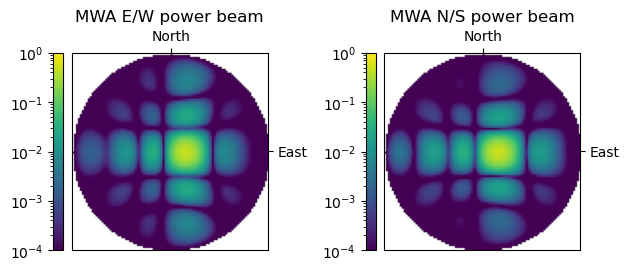

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

from pyuvdata import UVBeam
from pyuvdata.datasets import fetch_data

filename = fetch_data("mwa_full_EE")

mwa_beam = UVBeam.from_file(filename, pixels_per_deg=1, delays=delays)
mwa_beam.efield_to_power()

# set up zenith angle, azimuth and frequency arrays to evaluate with
# make a regular grid in direction cosines for nice plots
n_vals = 100
zmax = np.radians(90)  # Degrees
axis_arr = np.arange(-n_vals/2., n_vals/2.) / float(n_vals/2.)
l_arr, m_arr = np.meshgrid(axis_arr, axis_arr)
radius = np.sqrt(l_arr**2 + m_arr**2)
za_array = radius * zmax
az_array = np.arctan2(m_arr, l_arr)

# Wrap the azimuth array to [0, 2pi] to match the extent of the UVBeam azimuth
where_neg_az = np.nonzero(az_array < 0)
az_array[where_neg_az] = az_array[where_neg_az] + np.pi * 2.
az_array = az_array.flatten()
za_array = za_array.flatten()

# find the values above the horizon so we don't try to interpolate the MWA beam
# beyond the horizon
above_hor = np.nonzero(za_array <= np.pi / 2.)[0]
mwa_beam_vals = np.full((1, 4, 1, n_vals * n_vals), np.inf, dtype=complex)

# The MWA beam we have in our test data is small, it only has 3 frequencies,
# so we will just get the value at one of those frequencies rather than
# trying to interpolate to a new frequency.
freqs = np.array([mwa_beam.freq_array[-1]])

mwa_beam_vals[:, :, :, above_hor], _ = mwa_beam.interp(
      az_array=az_array[above_hor], za_array=za_array[above_hor], freq_array=freqs
)
mwa_beam_vals = mwa_beam_vals.reshape(4, n_vals, n_vals)

fig, ax = plt.subplots(1, 2)
bp_dip = ax[0].imshow(
    np.abs(mwa_beam_vals[0]),
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[0].set_title(f"MWA E/W power beam")
_ = fig.colorbar(bp_dip, ax=ax[0], fraction=0.046, pad=0.04, location="left")

bp_mwa = ax[1].imshow(
    np.abs(mwa_beam_vals[1]),
    norm=LogNorm(vmin = 1e-4, vmax =1),
    extent=[np.min(l_arr), np.max(l_arr), np.min(m_arr), np.max(m_arr)],
)
_ = ax[1].set_title(f"MWA N/S power beam")
_ = fig.colorbar(bp_mwa, ax=ax[1], fraction=0.046, pad=0.04, location="left")

for ind in range(2):
    _ = ax[ind].set_xticks([0], labels=["North"])
    _ = ax[ind].set_yticks([0], labels=["East"])
    _ = ax[ind].yaxis.set_label_position("right")
    _ = ax[ind].yaxis.tick_right()
    _ = ax[ind].xaxis.set_label_position("top")
    _ = ax[ind].xaxis.tick_top()

fig.tight_layout()


In [6]:
ee_power_vals = mwa_beam_vals[0].real
nn_power_vals = mwa_beam_vals[1].real
finite_mask = np.isfinite(ee_power_vals)
max_ee_loc = np.nonzero(ee_power_vals == np.max(ee_power_vals[finite_mask]))
max_nn_loc = np.nonzero(nn_power_vals == np.max(nn_power_vals[finite_mask]))
print(max_ee_loc)
print(max_nn_loc)

(array([50]), array([57]))
(array([50]), array([58]))


In [7]:
az_array_grid = az_array.reshape(n_vals, n_vals)
za_array_grid = za_array.reshape(n_vals, n_vals)

In [8]:
print("max_ee_az", np.rad2deg(az_array_grid[max_ee_loc]))
print("max_ee_za", np.rad2deg(za_array_grid[max_ee_loc]))
print("max_nn_az", np.rad2deg(az_array_grid[max_nn_loc]))
print("max_nn_za", np.rad2deg(za_array_grid[max_nn_loc]))

max_ee_az [0.]
max_ee_za [12.6]
max_nn_az [0.]
max_nn_za [14.4]


In [9]:
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>